# **Trotter Error vs Number of Steps**

This notebook analyzes the error introduced by Trotterization as a function of the number of Trotter steps. It computes the difference between the ideal matrix and the trotterized matrix then visualizes how the error decreases as the number of steps increases.

Specifically, this notebook does this analysis with a quantum state evolved according to the hamiltonian $H = X + 0.1Z$. After inputting into the Schrödinger equation, the state takes the form 
\begin{equation}
|\psi\rangle = e^{-it(X + 0.1Z)}
\end{equation}
which we break into the form
\begin{equation}
|\psi\rangle = (e^{-itX/n}e^{-0.1itZ/n})^n + \epsilon(n)
\end{equation}
where $\epsilon$ is the trotter error. We can then calculate the error created by this approximation as $n$ increaases by calculating the norm of the difference of the trotterized matrix versus an ideal matrix.

In [6]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
import numpy as np
import scipy

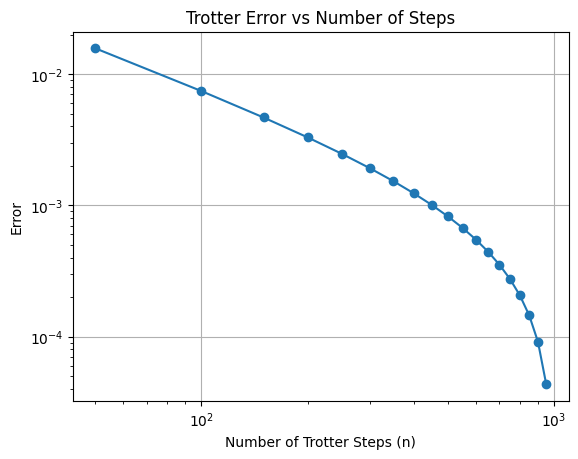

In [ ]:
# Constructs a trotterized Hamiltonian for a given number of steps
def trotterized_hamiltonian(steps, t=10):
    # Rx and Rz Gates
    rx = np.matrix([[np.cos(t/steps), -1j*np.sin(t/steps)],
                    [-1j*np.sin(t/steps), np.cos(t/steps)]])
    rz = np.matrix([[np.exp(-1j*t*0.1/steps), 0],
                    [0, np.exp(1j*t*0.1/steps)]])
    
    result = np.identity(2, dtype=complex)
    for _ in range(steps):
        result = np.matmul(result, rx)
        result = np.matmul(result, rz)
    return result

def ideal_hamiltonian(t=10):
    # True Hamiltonian for H = X + 0.1Z
    X = np.matrix([[0, 1], [1, 0]], dtype=complex)
    Z = np.matrix([[1, 0], [0, -1]], dtype=complex)
    return scipy.linalg.expm(-1j * t * (X + 0.1 * Z))

all = []
n_values = range(50, 1001, 50)

np.set_printoptions(suppress=True)
for i in n_values:
    h = trotterized_hamiltonian(i)
    all.append(h)

# Using 1000 steps as an arbitrary "perfect" matrix
errors = []
for i in range(len(all)-1):
    errors.append(scipy.linalg.norm(all[-1] - all[i]))

plt.plot(n_values[:-1], errors, marker='o')
plt.xlabel('Number of Trotter Steps (n)')
plt.ylabel('Error')
plt.xscale('log')
plt.yscale('log')
plt.title('Trotter Error vs Number of Steps')
plt.grid()
plt.show()

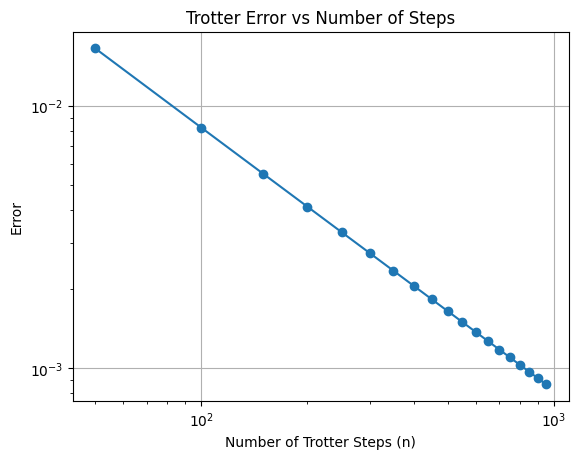

In [ ]:
errors.clear()
ideal_matrix = ideal_hamiltonian()
for i in range(len(all)-1):
    errors.append(scipy.linalg.norm(ideal_matrix - all[i]))

plt.plot(n_values[:-1], errors, marker='o')
plt.xlabel('Number of Trotter Steps (n)')
plt.ylabel('Error')
plt.xscale('log')
plt.yscale('log')
plt.title('Trotter Error vs Number of Steps')
plt.grid()
plt.show()

*Note on Results*

In the first graph, we take the "ideal" matrix to be a 1000 step trotterized matrix, while in the second case we calculate the "ideal" directly. This difference in reference explains the difference in shapes of the graphs, where the shape of the first graph is similar to the second but diverges for higher values of $n$. To explain the exact shape of the second graph, we need to examine how we reach the trotter expansion. We start with the exact time evolution matrix and make a few changes.
\begin{align*}
|\psi\rangle &= e^{-it(X + 0.1Z)} \\
&= (e^{-it(X + 0.1Z)/n})^n \\
&\approx (e^{-itX/n}e^{-0.1itZ/n} + \frac{C}{n^2})^n
\end{align*}
In the last step, notice how the leading order error in the decomposition of $e^{-it(X+0.1Z)}$ is $O(n^{-2})$. More on that result in week 3. For now, we can expand the above expression to the two leading orders using the binomial expansion which yields
\begin{equation*}
|\psi\rangle \approx e^{-itX}e^{-0.1itZ} + \frac{k}{n}
\end{equation*}
where $k$ is a constant. Thus, the error scales as $1/n$ which matches what we see in the above graph.